In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [3]:
taxis.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [4]:
sns.set_style('darkgrid')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Sobrevivientes')

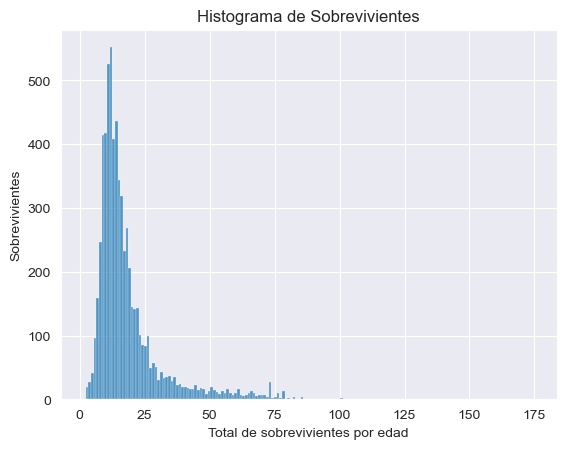

In [5]:
g = sns.histplot(data= taxis, x = 'total')
# add label
g.set_title('Histograma de Sobrevivientes')
g.set_xlabel('Total de sobrevivientes por edad')
g.set_ylabel('Sobrevivientes')

Text(0.5, 0, 'Total de sobrevientes por edad')

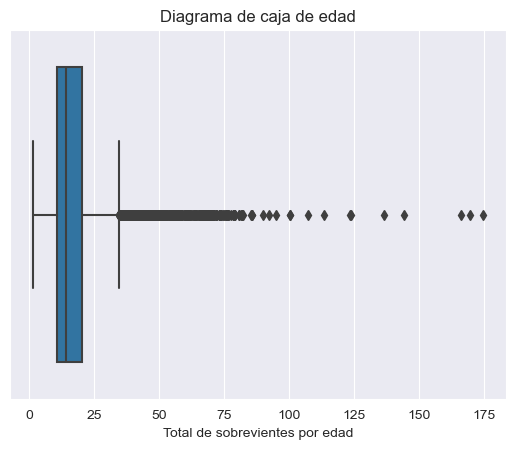

In [6]:
# diagrama de caja
t = sns.boxplot(data= taxis, x= 'total')

# Agregar titulo y cambiar el label x
t.set_title('Diagrama de caja de edad')
t.set_xlabel('Total de sobrevientes por edad')

In [7]:
# Z-escore
from scipy.stats import zscore
# calculate z-core for eaaach data point and commpute its absolute value
z_scores = zscore(taxis['total'])
abs_z_scores = np.abs(z_scores)

# Select the ouliers using a threshold of 3
outliers = taxis[abs_z_scores > 3 ]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,52.0,0.00,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,Midtown South,JFK Airport,Manhattan,Queens
188,2019-03-26 15:06:47,2019-03-26 15:59:52,1,18.41,52.0,0.02,5.76,61.08,yellow,credit card,JFK Airport,Midtown Center,Queens,Manhattan
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn


In [8]:
print(f'Numero de outliers: {len(outliers)}')

Numero de outliers: 185


In [9]:
# import the median_abs_deviation function
from scipy.stats import median_abs_deviation
# calculate median absolute deviation
mad = median_abs_deviation(taxis['total'])
mad

4.199999999999999

In [10]:
# import MAD estimator
from pyod.models.mad import MAD
# set thresholds to 3.5
mad = MAD(threshold=3.5)
# convert the 'total' column into 2d numpy array
total_reshaped = taxis['total'].values.reshape(-1, 1)
#generate inline and outliers labels
labels = mad.fit(total_reshaped).labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
seven_fifth = taxis['total'].quantile(0.75)
twenty_fifth = taxis['total'].quantile(0.25)
# obtain the iqr 
iqr = seven_fifth - twenty_fifth

# upper and lower thresholds
upper_limit = seven_fifth + (1.5 * iqr)
lower_limit = twenty_fifth - (1.5 * iqr)

# subset the dataset
outliers = taxis[(taxis['total'] > lower_limit) & (taxis['total'] < upper_limit)]
outliers.head()



,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan


In [12]:
outliers = taxis[labels == 1]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.5,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.0,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
53,2019-03-20 18:49:24,2019-03-20 19:12:40,1,13.45,36.0,0.00,0.00,37.80,yellow,cash,JFK Airport,Sunnyside,Queens,Queens


In [13]:
#Rango intercuartilico (IQR)
seven_fifth = taxis['total'].quantile(0.75)
twenty_fifth = taxis['total'].quantile(0.25)
# obtain the iqr 
iqr = seven_fifth - twenty_fifth

# upper and lower thresholds
upper_limit = seven_fifth + (1.5 * iqr)
lower_limit = twenty_fifth - (1.5 * iqr)

# subset the dataset
outliers = taxis[(taxis['total'] > lower_limit) & (taxis['total'] < upper_limit)]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan


In [14]:
print(f'numero de outliers {labels.sum()}')

numero de outliers 560


In [15]:
#imputar
taxis_filteres = taxis.copy()
taxis_filteres = taxis_filteres[labels == 0]
# imputar
# calculate the median
median_value = taxis['total'].median()

# immpute the ouliers with the median
taxis_imputed = taxis.copy()
taxis_imputed.loc[outliers.index, 'total']= median_value
taxis_imputed

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,14.16,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,14.16,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,14.16,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,14.16,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,14.16,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,14.16,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [16]:
# winzorizar
from scipy.stats.mstats import winsorize
taxis_winzorized = taxis.copy()
taxis_winzorized['total'] = winsorize(taxis_winzorized['total'],limits=[0.05,0.05],inplace=True)
taxis_winzorized.sort_values(by=['total'],ascending=False)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5833,2019-03-06 17:12:17,2019-03-06 18:40:50,1,12.79,57.0,0.00,0.00,48.09,green,credit card,Queensbridge/Ravenswood,Flatlands,Queens,Brooklyn
4192,2019-03-08 08:19:28,2019-03-08 08:55:37,1,16.53,48.0,0.00,5.76,48.09,yellow,cash,Lincoln Square East,LaGuardia Airport,Manhattan,Queens
3992,2019-03-16 08:21:21,2019-03-16 08:52:57,5,10.90,34.5,8.71,5.76,48.09,yellow,credit card,LaGuardia Airport,Lincoln Square East,Queens,Manhattan
2122,2019-03-08 00:40:32,2019-03-08 01:11:53,1,15.51,44.0,16.27,17.28,48.09,yellow,credit card,TriBeCa/Civic Center,West Brighton,Manhattan,Staten Island
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,48.09,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,2019-03-30 00:13:45,2019-03-30 00:18:31,1,0.99,5.5,0.00,0.00,7.30,green,cash,Long Island City/Hunters Point,Queensbridge/Ravenswood,Queens,Queens
6000,2019-03-15 11:20:24,2019-03-15 11:26:44,1,0.97,5.5,0.00,0.00,7.30,green,cash,Astoria,Astoria,Queens,Queens
3184,2019-03-07 08:55:44,2019-03-07 08:58:43,1,0.48,4.0,0.00,0.00,7.30,yellow,cash,Garment District,Penn Station/Madison Sq West,Manhattan,Manhattan
1175,2019-03-25 14:10:09,2019-03-25 14:11:35,1,0.45,3.5,0.00,0.00,7.30,yellow,cash,Upper East Side North,Upper East Side North,Manhattan,Manhattan
